In [1]:
import numpy as np
import sys
sys.path.insert(0, '../src/')
from dft1d import dft1d
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])
# Author: Elvis do A. Soares
# Github: @elvissoares
# Date: 2023-02-24

In [2]:
def ljpotential(r,eps=1.0,sigma=1.0):
    return 4*eps*((sigma/r)**(12)-(sigma/r)**(6))

# Defining the fluid properties

In [3]:
# fluid properties
sigma = 1.0
epsilon = 1.0
L = 10.0*sigma
# Temperature and Density 
kT = 0.71
rhob = 0.84

# Defining the functional 


In [10]:
# Test the HS functional 
dft = dft1d(fmtmethod='WBI',ljmethod='MMFA',geometry='Spherical')
dft.Set_Geometry(L=L)
dft.Set_FluidProperties(sigma=sigma,epsilon=epsilon)
dft.Set_Temperature(kT)
dft.Set_BulkDensity(rhob)
Vext = ljpotential(dft.r)
dft.Set_External_Potential(Vext)
dft.Set_InitialCondition()
dft.alpha0 = 0.02
dft.dt = 0.05
dft.Calculate_Equilibrium(logoutput=False)

---- Setting external potential by user ----


/home/elvis/Google Drive/Projetos em Andamento/3-DFT 3D for H2 storage in MOF/codes/PyDFTlj/examples/../src/dft1d.py:20: RuntimeWarning: invalid value encountered in log
  return np.piecewise(eta,[eta<=1e-3,eta>1e-3],[lambda eta: 1-2*eta/9-eta**2/18,lambda eta: 2*(eta+np.log(1-eta)*(1-eta)**2)/(3*eta**2)])
/home/elvis/Google Drive/Projetos em Andamento/3-DFT 3D for H2 storage in MOF/codes/PyDFTlj/examples/../src/dft1d.py:23: RuntimeWarning: invalid value encountered in log
  return np.piecewise(eta,[eta<=1e-3,eta>1e-3],[lambda eta: -2/9-eta/9-eta**2/15.0,lambda eta: (2*(eta-2)*eta+4*(eta-1)*np.log(1-eta))/(3*eta**3)])
/home/elvis/Google Drive/Projetos em Andamento/3-DFT 3D for H2 storage in MOF/codes/PyDFTlj/examples/../src/dft1d.py:286: RuntimeWarning: invalid value encountered in log
  dPhidn0 = -np.log(self.oneminusn3 )
/home/elvis/Google Drive/Projetos em Andamento/3-DFT 3D for H2 storage in MOF/codes/PyDFTlj/examples/../src/dft1d.py:259: RuntimeWarning: invalid value encountered i

In [11]:
dft.rho

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

## 2. Mean-Field Functional (MFA)

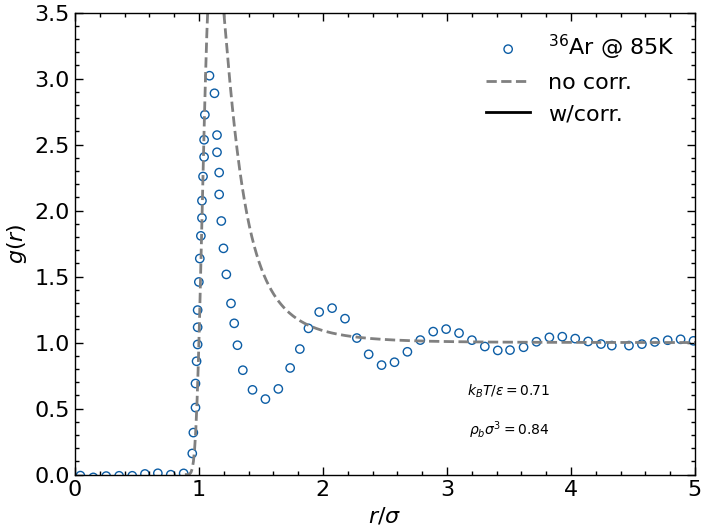

In [12]:
import pandas as pd
df = pd.read_excel('MCdata/MCdata-radialdistribution-lennardjones-Verlet1968.xls',sheet_name='Argon')
plt.scatter(df['r']/3.405,df['KT=0.71-rhob=0.84'],marker='o',edgecolors='C0',facecolors='none',label=r'${}^{36}$Ar @ 85K')
plt.plot(dft.r[90:],np.exp(-dft.beta*dft.Vext[90:]),'--',color='grey',label=r'no corr.')
plt.plot(dft.r,dft.rho/dft.rhob,'-',color='k',label=r'w/corr.')
plt.xlim(0.0,5)
plt.ylim(0,3.5)
plt.xlabel(r'$r/\sigma$')
plt.ylabel(r'$g(r)$')
plt.text(3.5,0.6,r'$k_B T/\epsilon = 0.71$',ha='center')
plt.text(3.5,0.3,r'$\rho_b \sigma^3 = 0.84$',ha='center')
plt.legend(loc='upper right',ncol=1)